# FC 온라인 특정 선수 분석 프로그램 개발

- 필요 라이브러리 호출

In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

import json
from time import sleep
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] =False

# Warnings 제거
import warnings
warnings.filterwarnings('ignore')

---

## 1. 데이터 크롤링

- 선수 이름, 시즌 ID, 시즌 이름을 사용자에게 입력받기
- 입력 받은 선수 분석 시행

#### 1) 분석 실시할 선수 카드 입력
- 우선 코드 작동 확인을 위해 `손흥민(22 UEFA Champions League)` 카드를 예시로 분석해보기로 한다.

In [10]:
# 선수 이름, 시즌 카드 받아오기
player_search = input("선수 이름을 입력해주세요.")
season_icon_number = input("시즌 아이콘을 선택해주세요.")
season_icon = input("시즌 아이콘을 선택해주세요.")

# 선수 이름, 시즌 카드 확인
print(player_search)
print(season_icon_number)
print(season_icon)

손흥민
280
22 UEFA Champions League


#### 2) 데이터 스크래핑 진행(BeautifulSoup)

- 선수 리뷰 페이지 url에서 page, searchword, season 변수에 값을 변경하며 조회

- 먼저 첫 페이지 html을 크롤링한 후, 마지막 페이지 번호를 받아온다.

- 비어있는 comment_list를 생성하고 반복문을 통해 마지막 페이지까지 유저의 선수 리뷰를 스크래핑한 후에 comment_list에 추가한다.

In [4]:
# 기본 첫페이지 선택
page = 1

In [5]:
# FC온라인 인벤 선수 평가 페이지 가져오기
url = f'https://fconline.inven.co.kr/dataninfo/rate/index.php?pg={page}&searchword={player_search}&season={season_icon_number}'
res = requests.get(url)
soup = BeautifulSoup(res.text,'html.parser')

print(soup.prettify())

<!DOCTYPE html>
<html lang="ko">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>
  <meta content="IE=EDGE" http-equiv="X-UA-Compatible"/>
  <meta content="FC 온라인,FCO,Fifa online4,선수 DB,비교,평가,공략,세레모니,페이스온,넥슨,선수 평가" name="keywords"/>
  <meta content="FC 온라인 정보, FCO, 피파 온라인4, Fifa4, 뉴스, 스쿼드 시뮬레이터, 선수 정보, 팁과 노하우, 전술 상담, 개인기, 영상관, 커뮤니티 제공" name="description"/>
  <meta content="3a508505e9bf09f6b8b7abe782e34f3cc895eb65" name="naver-site-verification"/>
  <meta content="fifaonline4" name="inven-site"/>
  <meta content="FC 온라인" name="inven-sitename"/>
  <meta content="FC 온라인 인벤 - 선수 평가" property="og:title"/>
  <meta content="website" property="og:type"/>
  <meta content="FC 온라인 정보, FCO, 피파 온라인4, Fifa4, 뉴스, 스쿼드 시뮬레이터, 선수 정보, 팁과 노하우, 전술 상담, 개인기, 영상관, 커뮤니티 제공" property="og:description"/>
  <meta content="epQ3o9/DAnrbAb/WBooH9Q==" id="inven-verification" name="inven-verification"/>
  <title>
   FC 온라인 인벤 - 선수 평가
  </title>
  <link href="https://www.inven.co.kr/common/

In [6]:
# 마지막 페이지 넘버 받아오기
pages = soup.select('span.basetext > a.pg')
last_page = pages[-1].get_text()
last_page

'10'

In [7]:
# 선수 리뷰 리스트 생성
comment_list = []

# 마지막 페이지까지 크롤링
for page in range(1, int(last_page)+1):
    url = f'https://fconline.inven.co.kr/dataninfo/rate/index.php?pg={page}&searchword={player_search}&season={season_icon_number}'
    
    # 페이지 comment 받아오기
    comments = soup.select('span.fifa4.comment')
    res = requests.get(url)
    soup = BeautifulSoup(res.text,'html.parser')
    
    # 페이지별 comment 리뷰 리스트에 추가하기
    for comment in comments:
        comment_list.append(comment.get_text())


In [8]:
# 총 리뷰 개수
len(comment_list)

200

- 리뷰 리스트 생성 완료

In [9]:
# 총 리뷰 리스트
comment_list

['금카 사용 중이고, 콘차붐이랑 투톱으로 기용하거나 공미로 사용 중인데중거리면 중거리감차면 감차그냥 개사기다한가지 단점이 있다면 슛이 너무 좋으니까 자꾸 그것만 하려는 습관이 생겨버림...',
 '금카 아직 현역이다 7조대 가성비 금흥민감차 치달 퍼터 중거리 미쳤음 체감까지 괜찮고 금카케미까지 받을 수 있어서 메리트 있음진짜 솔직히 24토티은카 8조짜리랑 차이가 없음걍 진짜 좋음..',
 '금카 사용중CAP보다는 확실히 우위의 22시즌 나머지 120오버롤 대비해서 다 거기서 거기이고 이게 제일 가겨대비 성능도 좋음딱 윙어에 10조 이상 금카 흥민이 쓰는건 조금 낭비임이걸로 솔직히 흥민이는 FC온라인 종결임',
 '\t24토티+5 쓰다가 급여 때문에 이거 금카로 넘어왔는데 솔직히 블라인드 테스트하면 못 맞출 것 같음 비슷비슷한 듯',
 '다른시즌에 비해서는 모르겠는데 22챔 금카 공미로두고 중거리 개맛있게먹는중 궤적이 진짜다름 금카 개좋음진짜윗시즌금카부터는 14조라서 이게 가성비 국밥임',
 '3년째 챔스거주중 키보드유저 캡금이랑 다를거없고 몸싸움이랑 드리블은 여전히 너무 안좋다 바로 이적시장침투',
 '금카 한번 써보고 싶습니다 부탁드립니다 형님들!',
 '금카 하한 전재산 제발팔아주세요ㅕ',
 '24토티기 훨씬 좋음',
 '금카 상한 알박 3일째 제발 팔아주세요,.,,',
 '이거 금카 캐미받고 톱 어떤가요',
 '현역케미가 없는데유',
 '요 며칠간 24토티 손흥민 은카 사용해보니까 23토티, 22챔스 8카보다 위치선정, 침투가 좋았음참여도 3/3이 아니라 3/2인 느낌임인벤 데이터 베이스를 어떻게 분석하는 지는 모르겠지만본가 손흥민은 참여도 3/2임22 챔스 금카 손흥민 , 24토티 손흥민 둘다 사용해본 결과 24토티 손흥민 5카로 정착함이유는 24토티가 확실히 똑똑했고 골 포인트가 더 높았고1대1 상황에서 24토티가 더 안정적임어시스트 횟수도 24토티 손흥민 5카가 확실히 많았음24토티는 st , cf , lw , rw로 사용했을때 패마로 특성단 22

---

## 2. 선수 리뷰 기반 감정 분석

### 1) 텍스트 사전 준비작업

#### ㄴ 텍스트 전처리

- 형태소 토큰화

In [ ]:
# 한국어 형태소 분석기 라이브러리 호출
from konlpy.tag import Kkma, Komoran, Okt, Hannanum # 토큰화
from collections import Counter
from wordcloud import WordCloud
import nltk
import re

# 한국어 형태소 분석기 호출
okt = Okt()
kkma = Kkma()
komoran = Komoran()
hannanum = Hannanum()

#### ㄴ 클렌징(특수문자 삭제, 대소문자 변경)

In [18]:
result_list = []
for sentence in comment_list:
    okt_token = okt.pos(sentence)
    
    # 한국어, 숫자, 영어만 남기기
    result = []
    for token, pos in okt_token:  
        if re.match('^[a-zA-Z가-힣]+', token): 
            result.append((token,pos))

        # 결과 리스트에 저장
        result_list.append(result)

# 1차원 리스트로 변환(flatten)
tokens_list = [item for sublist in result_list for item in sublist] 
tokens_list

[('금카', 'Noun'),
 ('사용', 'Noun'),
 ('중이', 'Noun'),
 ('고', 'Josa'),
 ('콘차붐', 'Noun'),
 ('이랑', 'Josa'),
 ('투톱', 'Noun'),
 ('으로', 'Josa'),
 ('기용', 'Noun'),
 ('하', 'Suffix'),
 ('거나', 'Noun'),
 ('공', 'Modifier'),
 ('미로', 'Noun'),
 ('사용', 'Noun'),
 ('중', 'Noun'),
 ('인데', 'Josa'),
 ('중거리', 'Noun'),
 ('면', 'Josa'),
 ('중거리', 'Noun'),
 ('감', 'Noun'),
 ('차면', 'Verb'),
 ('감차', 'Noun'),
 ('그냥', 'Noun'),
 ('개사', 'Noun'),
 ('기', 'Modifier'),
 ('다한', 'Noun'),
 ('가지', 'Noun'),
 ('단점', 'Noun'),
 ('이', 'Josa'),
 ('있다면', 'Adjective'),
 ('슛', 'Noun'),
 ('이', 'Josa'),
 ('너무', 'Adverb'),
 ('좋으니까', 'Adjective'),
 ('자꾸', 'Noun'),
 ('그것', 'Noun'),
 ('만', 'Josa'),
 ('하려는', 'Verb'),
 ('습관', 'Noun'),
 ('이', 'Josa'),
 ('생겨', 'Verb'),
 ('버림', 'Verb'),
 ('금카', 'Noun'),
 ('사용', 'Noun'),
 ('중이', 'Noun'),
 ('고', 'Josa'),
 ('콘차붐', 'Noun'),
 ('이랑', 'Josa'),
 ('투톱', 'Noun'),
 ('으로', 'Josa'),
 ('기용', 'Noun'),
 ('하', 'Suffix'),
 ('거나', 'Noun'),
 ('공', 'Modifier'),
 ('미로', 'Noun'),
 ('사용', 'Noun'),
 ('중', 'Noun'),
 ('인데', 'Jo

#### ㄴ 필터링 / 스톱워드(의미없는 단어) 제거

In [19]:
# 불용어 제외하기
stopwords = []  # 불필요한 단어 리스트 stopwords 생성

# 일차 클렌징된 결과를 보고 제거하고 싶은 문자 불용어 사전에 추가
stopwords.append('수')
stopwords.append('ㅋ')
stopwords.append('ㅋㅋ')
stopwords.append('ㅋㅋㅋ')
stopwords.append('있음')
stopwords.append('선수')
stopwords.append('있어서')
stopwords.append('한국')
stopwords.append('진짜')
stopwords.append('8조')
stopwords.append('짜리랑')
stopwords.append('병신') # 1차 결과 지나치게 많이 나옴
stopwords.append(player_search) # 선수이름도 제외

cleaned_token1 = [] 
for word in tokens_list: 
    if (len(word[0]) != 1) and (word[0] not in stopwords) and word[1] not in ["Josa", "Eomi", "Punctuation"]:  
        cleaned_token1.append(word[0])  # token을 리스트에 더해준다

cleaned_token1

['금카',
 '사용',
 '중이',
 '콘차붐',
 '투톱',
 '기용',
 '거나',
 '미로',
 '사용',
 '중거리',
 '중거리',
 '차면',
 '감차',
 '그냥',
 '개사',
 '다한',
 '가지',
 '단점',
 '있다면',
 '너무',
 '좋으니까',
 '자꾸',
 '그것',
 '하려는',
 '습관',
 '생겨',
 '버림',
 '금카',
 '사용',
 '중이',
 '콘차붐',
 '투톱',
 '기용',
 '거나',
 '미로',
 '사용',
 '중거리',
 '중거리',
 '차면',
 '감차',
 '그냥',
 '개사',
 '다한',
 '가지',
 '단점',
 '있다면',
 '너무',
 '좋으니까',
 '자꾸',
 '그것',
 '하려는',
 '습관',
 '생겨',
 '버림',
 '금카',
 '사용',
 '중이',
 '콘차붐',
 '투톱',
 '기용',
 '거나',
 '미로',
 '사용',
 '중거리',
 '중거리',
 '차면',
 '감차',
 '그냥',
 '개사',
 '다한',
 '가지',
 '단점',
 '있다면',
 '너무',
 '좋으니까',
 '자꾸',
 '그것',
 '하려는',
 '습관',
 '생겨',
 '버림',
 '금카',
 '사용',
 '중이',
 '콘차붐',
 '투톱',
 '기용',
 '거나',
 '미로',
 '사용',
 '중거리',
 '중거리',
 '차면',
 '감차',
 '그냥',
 '개사',
 '다한',
 '가지',
 '단점',
 '있다면',
 '너무',
 '좋으니까',
 '자꾸',
 '그것',
 '하려는',
 '습관',
 '생겨',
 '버림',
 '금카',
 '사용',
 '중이',
 '콘차붐',
 '투톱',
 '기용',
 '거나',
 '미로',
 '사용',
 '중거리',
 '중거리',
 '차면',
 '감차',
 '그냥',
 '개사',
 '다한',
 '가지',
 '단점',
 '있다면',
 '너무',
 '좋으니까',
 '자꾸',
 '그것',
 '하려는',
 '습관',
 '생겨',
 '버림',
 '금카',
 '사용',
 '중이',

In [20]:
# 클렌징된 단어들 빈도수 카운팅
counts = Counter(cleaned_token1)
counts

Counter({'토티': 5525,
         '사용': 2847,
         '체감': 1930,
         '시즌': 1817,
         '느낌': 1739,
         '챔스': 1594,
         '금카': 1580,
         '침투': 1543,
         '은카': 1507,
         '그냥': 1365,
         '몸싸움': 1294,
         '아니라': 1155,
         '움직임': 958,
         '확실히': 942,
         '비교': 912,
         '수비': 882,
         '중거리': 870,
         '하면': 868,
         '무난': 852,
         '기준': 829,
         '박스': 813,
         '너무': 777,
         '기존': 773,
         '쓰고': 765,
         '했을': 736,
         '급여': 721,
         '정도': 720,
         '스텟': 713,
         '하는': 696,
         '추천': 696,
         '좋은': 691,
         '좋았음': 684,
         '참여': 684,
         '이유': 683,
         '귀속': 665,
         '호날두': 656,
         '아니지만': 656,
         '비슷함': 656,
         '근데': 629,
         '좋음': 625,
         '좋게': 612,
         '좋고': 589,
         '해서': 565,
         '결과': 559,
         '인벤': 558,
         '성능': 556,
         '주고': 549,
         '퍼터': 544,
         '슈팅': 518

In [21]:
# 전체 token 개수
print(len(cleaned_token1))  

# unique token 개수
print(len(set(cleaned_token1)))  

163509
1180


### 2) Lexicon 기반 감정 분석
- 감정 사전을 활용해 각 단어에 긍정 또는 부정 점수를 부여.

- 감정 점수 = 긍정 단어의 합 - 부정 단어의 합으로 문장의 감정 점수를 계산.

- 간단하지만 도메인 특화 감정을 제대로 반영하기 어렵다는 한계를 가지고 있음
    - 해당 한계 극복을 위해

#### ㄴ 사전 불러오기
- KNU 감성어 사전

- 감성어 사전 출처 : https://github.com/park1200656/KnuSentiLex/tree/master/KnuSentiLex/data

In [22]:
# 사전 불러오기
with open('SentiWord_info.json', encoding='utf-8-sig', mode='r') as f: 
  word_info = json.load(f)

word_df = pd.DataFrame(word_info)
word_df

,word,word_root,polarity
0,(-;,(,1
1,(;_;),(;_;),-1
2,(^^),(^^),1
3,(^-^),(^-^),1
4,(^^*,(,1
...,...,...,...
14859,오진다,오지,2
14860,오져,오지,2
14861,오져버림,오지,2
14862,오졌다,오지,2


- 사전 데이터 타입 맞추기(polarity 컬럼 : str $\rightarrow$ int)

In [23]:
word_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14864 entries, 0 to 14863
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   word       14864 non-null  object
 1   word_root  14864 non-null  object
 2   polarity   14864 non-null  object
dtypes: object(3)
memory usage: 348.5+ KB


In [24]:
# polarity 를 정수 타입으로 변환
word_df['polarity'] = word_df['polarity'].astype(int)

# 변환 확인
print(type(word_df['polarity'][0]))

<class 'numpy.int64'>


#### ㄴ 데이터 프레임 merge

In [25]:
# 단어 및 카운트 수 저장할 데이터 프레임 생성
count_df = pd.DataFrame(columns=['word','count'])

In [26]:
# counts 딕셔너리에서 key값과 value값 각 컬럼에 삽입
count_df['word'] = counts.keys()
count_df['count'] = counts.values()
count_df

,word,count
0,금카,1580
1,사용,2847
2,중이,88
3,콘차붐,88
4,투톱,427
...,...,...
1175,하다고,73
1176,비슷하거나,73
1177,받았음,73
1178,멸망,7


In [27]:
# 최종 토큰, 카운트, word_root, polarity 데이터 프레임으로 merge
merge_df = pd.merge(count_df, word_df, how='left', on='word')
merge_df['polarity'] = merge_df['polarity'].fillna(0)
merge_df.head(3)

,word,count,word_root,polarity
0,금카,1580,NaN,0.0
1,사용,2847,NaN,0.0
2,중이,88,NaN,0.0


In [28]:
# 추천 점수 산출 
merge_df['polarity'].sum()

np.float64(44.0)

> ### 최종 점수 : `44점` $\rightarrow$ `추천`

### 3) 상세 선수 평가

#### ㄴ 긍정 평가

In [29]:
# 어근(word_root) 기준 중복제거한 단어
positive_df = merge_df[(merge_df['polarity'] > 0)].drop_duplicates(subset='word_root').sort_values(by='count', ascending=False)
positive_df.head()

,word,count,word_root,polarity
252,추천,696,추천,2.0
43,좋음,625,좋,2.0
141,안정,342,안정,1.0
1026,적극,328,적극,1.0
1008,뽀록,328,뽀록,1.0


#### ㄴ 부정 평가

In [ ]:
# 어근(word_root) 기준 중복제거한 단어
negative_df = merge_df[(merge_df['polarity'] < 0)].drop_duplicates(subset='word_root').sort_values(by='count', ascending=False)
negative_df.head()

,word,count,word_root,polarity
984,약하고,328,약하,-1.0
59,낭비,106,낭비,-1.0
595,과금,83,과,-1.0
248,이상하게,66,이상,-1.0
327,어중간한,64,어중간,-1.0


#### ㄴ 어근 기준 중복제거한 긍정, 부정 데이터 프레임 병합

In [32]:
result_df = pd.concat([positive_df,negative_df],ignore_index=True)
result_df.head()

,word,count,word_root,polarity
0,추천,696,추천,2.0
1,좋음,625,좋,2.0
2,안정,342,안정,1.0
3,적극,328,적극,1.0
4,뽀록,328,뽀록,1.0


#### ㄴ 긍정, 부정 라벨링


In [33]:
result_df['senti_cat'] = list(map(lambda x:'긍정' if  x> 0 else '부정' if x < 0 else '중립', result_df.polarity))
result_df.head()

,word,count,word_root,polarity,senti_cat
0,추천,696,추천,2.0,긍정
1,좋음,625,좋,2.0,긍정
2,안정,342,안정,1.0,긍정
3,적극,328,적극,1.0,긍정
4,뽀록,328,뽀록,1.0,긍정


### 4) 추천 정도 제안

#### ㄴ 워드 클라우드 생성을 위한 설정

In [36]:
# 감성 단어군에 따라 색깔 지정
color_to_words = {
    'red' : list(result_df.loc[result_df.senti_cat == '부정', 'word']),
    'navy': list(result_df.loc[result_df.senti_cat == '긍정', 'word'])}

default_color = 'grey'

# 각각의 단어에 색깔 지정
class SimpleGroupedColorFunc(object):
    def __init__(self, color_to_words, default_color):
        self.word_to_color = {word: color
                              for (color, words) in color_to_words.items()
                              for word in words}

        self.default_color = default_color

    def __call__(self, word, **kwargs):
        return self.word_to_color.get(word, self.default_color)

#### ㄴ 워드 클라우드 시각화

(np.float64(-0.5), np.float64(799.5), np.float64(399.5), np.float64(-0.5))

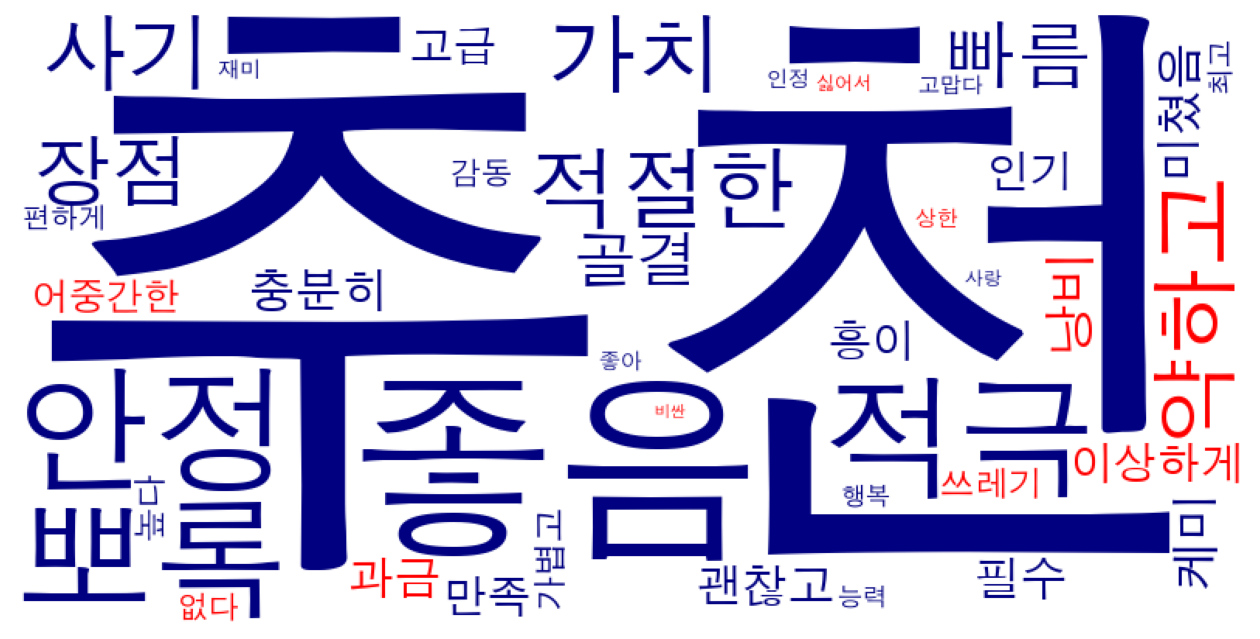

In [37]:
simple_color_func = SimpleGroupedColorFunc(color_to_words, default_color)
wc_frequencies = dict(zip(result_df['word'],result_df['count']))


wc = WordCloud(font_path='AppleGothic', scale=2.0, max_font_size=250, color_func = simple_color_func,
               background_color="white").generate_from_frequencies(wc_frequencies)
plt.figure(figsize = (16,  16))
plt.imshow(wc)
plt.axis("off")